### 목표
- 선형회귀 이론에 대해 이해해보자
- LinearModel을 사용해보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 생성
data = pd.DataFrame({'시간': [2,4,8,9], '성적':[20,40,80,90]},
                    index = ['교인','홍철','상석','승철'])
data

,시간,성적
교인,2,20
홍철,4,40
상석,8,80
승철,9,90


### 선형모델을 활용
- 7시간 공부했을때의 성적 예측

In [2]:
# 수학공식을 활용한 해석적 방법 -> mse 를 가지고 찾아가는 방법
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [3]:
# 모델 객체생성
linear_model = LinearRegression()
# 단순선형회귀모델인 LinearRegerssion 은 하이퍼파라미터가 없음

In [9]:
# 모델학습
# model.fit(학습용문제, 학습용정답)
# model.fit(시간, 성적)
# 문제 > 2차원, 정답 > 1차원
data[['시간']]
data['성적']
linear_model.fit(data[['시간']],data['성적'])
# 최적의 직선을 그려본것!

LinearRegression()

In [11]:
# 우리가 스스로 예측한 예상 직선 > y = 10x
# 모델이 예측한 직선을 확인 (y = wx + b)
print('가중치(w):', linear_model.coef_)
print('절편(b):', linear_model.intercept_)
# 부동소수점 > 소수점을 앞으로 15번 이동 > 거의 0과 같음
# y = 10 x + 0

가중치(w): [10.]
절편(b): 7.105427357601002e-15


In [12]:
# 모델 예측
# model.predict(테스트용문제) > 문제데이터 2차원
# 7시간 공부했을때 성적은?
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

##### 경사하강법 그래프 그려보기
- 선형모델의 MSE(평균제곱오차)가 최소가 되는 W,B값을 찾아나가는 방법
- 가중치(w) 변화에 따른 비용함수(cost) 값의 변화그래프 출력
    - 비용함수는 원래의 값과 가장 오차가 작은 함수를 도출하기위해 사용되는 함수

In [13]:
# 가설 함수 설정
def h(w,x):
    return w*x + 0
# 우리가 w 값이 달라질경우 계속해서 다른수로 바꿔주어야한다!

In [14]:
# 비용함수 설정 (MSE)
def cost (data, target, weight):
    # data: 예측할 데이터의 x값, target: 실제답, weight : 가중치
    y_pre = h(weight, data)
    mse = ((y_pre-target)**2).mean()  # (예측값-실제값)
    return mse

In [15]:
# 우리가 예측한 가중치가 10일때 MSE
cost(data['시간'], data['성적'], 10)
# 오차가 0

0.0

In [17]:
# 가중치가 5일때
cost(data['시간'], data['성적'], 5)

1031.25

In [18]:
# 가중치 15
cost(data['시간'], data['성적'], 15)

1031.25

In [19]:
# 가중치 12
cost(data['시간'], data['성적'], 12)

165.0

- w(가중치) 값의 변화에 따른 MSE 변화율 그래프 그리기 > 경사하강법

In [20]:
w_arr = range(-10,31) # -10~30

In [21]:
# 반복문을 사용해서 -10~30 까지의 mse 를 구해서 리스트에 담기
cost_list = []
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

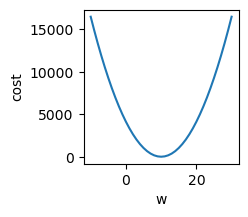

In [24]:
# 그래프 그리기
plt.figure(figsize = (2,2))
plt.plot(w_arr,cost_list) # (x축, y축)
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

### SGDRegressor 모델 사용해보기
- 사이킷런에서 구성해놓은 경사하강법을 활요한 선형회귀모델
- 경사하강법을 이용하는 모델
- SGD(확률적 경사하강법, Stochastic Gradient Descent)

In [1]:
# 도구 불러오기
from sklearn.linear_model import SGDRegressor

In [3]:
# 확률적경사하강법 모델 생성
sgd = SGDRegressor(eta0 = 0.0001, # 러닝레이트, 학습률, 보폭
            max_iter=500, # w 값 업데이트 횟수 > 500번 업데이트
            verbose= 1) # 진행상황을 출력해줘

In [4]:
# 학습
sgd.fit(data[['시간']], data['성적'])
# epoch 반복횟수
# loss (오차)가 낮을수록 좋다!

-- Epoch 1
Norm: 0.13, NNZs: 1, Bias: 0.018541, T: 4, Avg. loss: 2044.163802
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 1, Bias: 0.032741, T: 8, Avg. loss: 1995.029314
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 1, Bias: 0.045046, T: 12, Avg. loss: 1955.378431
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 1, Bias: 0.056393, T: 16, Avg. loss: 1920.461948
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 1, Bias: 0.066995, T: 20, Avg. loss: 1888.340584
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 1, Bias: 0.076965, T: 24, Avg. loss: 1858.538253
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.62, NNZs: 1, Bias: 0.086499, T: 28, Avg. loss: 1830.539298
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.68, NNZs: 1, Bias: 0.095643, T: 32, Avg. loss: 1803.915400
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.74, NNZs: 1, Bias: 0.104423, T: 36, Avg. loss: 1778.576980
Total training time:

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=500, verbose=1)

In [5]:
# 예측
sgd.predict([[7]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([56.89070829])

### 호주 집가격 데이터셋 예측
- 데이터로드
- 입력데이터 5개 선택
    - 수치형데이터이면서 결측치가 없는 입력특성 5개선택하여 학습
- LinearRegression, SGDRegressor
    - 문제,답 분리
    - 훈련용, 평가용 분리
    - 모델 생성, 학습, 평가
        - 회귀모델의 평가지표 확인 (MSE)

In [6]:
# 데이터 로드 
# 변수명 house_data
house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [7]:
# 요약정보 확인
house_data.info()
# 관측치(행): 13580
# 입력특성 : 20 개
# 정답데이터: 1개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [10]:
# 정답데이터와의 입력특성간의 상관관계 확인
house_data.corr(numeric_only=True)['Price'].sort_values()

YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

In [11]:
# 입력특성선택
feature_names = ['Rooms', 'Bedroom2','Bathroom','Lattitude','Distance']
# Distanse: 시내로부터 떨어진 거리
# Lattitude: 위도

In [14]:
# 문제
X = house_data[feature_names]
X
# 정답
y = house_data['Price']

In [15]:
# 훈련용, 평가용 데이터 분리 (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, 
                                                    random_state=18)

In [16]:
# 크기확인
print("훈련용 문제데이터: ", X_train.shape)
print("훈련용 정답데이터: ",y_train.shape)
print("평가용 문제데이터: ",X_test.shape)
print("평가용 정답데이터: ",y_test.shape)

훈련용 문제데이터:  (9506, 5)
훈련용 정답데이터:  (9506,)
평가용 문제데이터:  (4074, 5)
평가용 정답데이터:  (4074,)


##### 모델학습

In [17]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression # 단순 MSE 계산 선형회귀모델
from sklearn.linear_model import SGDRegressor # 확률적경사하강법 선형회귀모델

In [18]:
# 모델객체생성
linear_model2 = LinearRegression()
sgd_model2 = SGDRegressor()

In [21]:
# 모델학습 > 하이퍼파라미터 조절 XX
linear_model2.fit(X_train, y_train)
sgd_model2.fit(X_train, y_train)

SGDRegressor()

In [22]:
# 모델평가 
# > score 함수 사용해서 모델평가하기
print("Linear_model: ",linear_model2.score(X_test,y_test))
print("SGD_model: ", sgd_model2.score(X_test,y_test))
# SGD 모델의 결과가 계속 바뀐돠 왜?
# 경사하강법은 학습시 초기값을 랜덤으로 설정하기 때문이다~

# 결과값이 의미하는것은? > MSE 가 아님!  > R2 score > 1에 가까울수록 잘 예측
# 선형회귀모델의 평가지표를 확인해보자!

Linear_model:  0.4581257064433225
SGD_model:  -1.0794356972404962


### 모델 평가지표 (분류,회귀)
- 분류의 평가지표 > 정확도(accuracy)
    - 범주형 데이터이기때문에 전체데이터서 몇개를 맞췄는지 비율을 확인
- 회귀는 정답을 맞췄는지의 기준이 애매하다! "오차기반"의 평가지표를 활용
    - MSE > 학습과정에서도 사용하지만 평가에서도 사용된다!

### 회귀모델 평가지표 (4개)
- MSE(Mean Squared Error, 평균제곱오차)
    - 실제값과 예측값의 차이 > 오차 제곱 평균을 구한값
- RMSE (Root)
    - MSE 에서 루트를 씌운값 (단위문제를 해결)
- MAE (Mean Absolute Error, 평균 절대값 오차)
    - 오차를 절대값으로 변환해서 평균값을 구해준 값
- R2 score
    - 분산을 활용한 예측 성능평가지표
    - 확률적으로 표현이됨 > 1에가까울수록 잘 예측했다고 판단

In [23]:
# MSE 구하기
from sklearn.metrics import mean_squared_error # MSE
# metrics 평가지표모음집

In [25]:
# (실제값 , 예측값) 비교
# (y_test, pre)
linear_pre = linear_model2.predict(X_test)
print("mse: ", mean_squared_error(y_test, linear_pre))
print("rmse: ", mean_squared_error(y_test, linear_pre)**0.5)
#약 47만 달러 차이가 난다!

mse:  220552447168.5896
rmse:  469630.11739941634


In [ ]:
# SGD 모델의 MSE, RMSE 확인하기!

In [26]:
sgd_pre = sgd_model2.predict(X_test)
print("mse: ", mean_squared_error(y_test, sgd_pre))
print("rmse: ", mean_squared_error(y_test, sgd_pre)**0.5)
# SGD 모델은 91만 달려 차이가 난다~

mse:  846367205843.7365
rmse:  919982.1769163447


- 오차와 평균값을 활용해서 정규화된 평가가 가능하게끔 만들어준 평가지표
- 평균수준의 예측모델인지, 오차가 적어서 잘 예측한 모델인지를 알수 있음
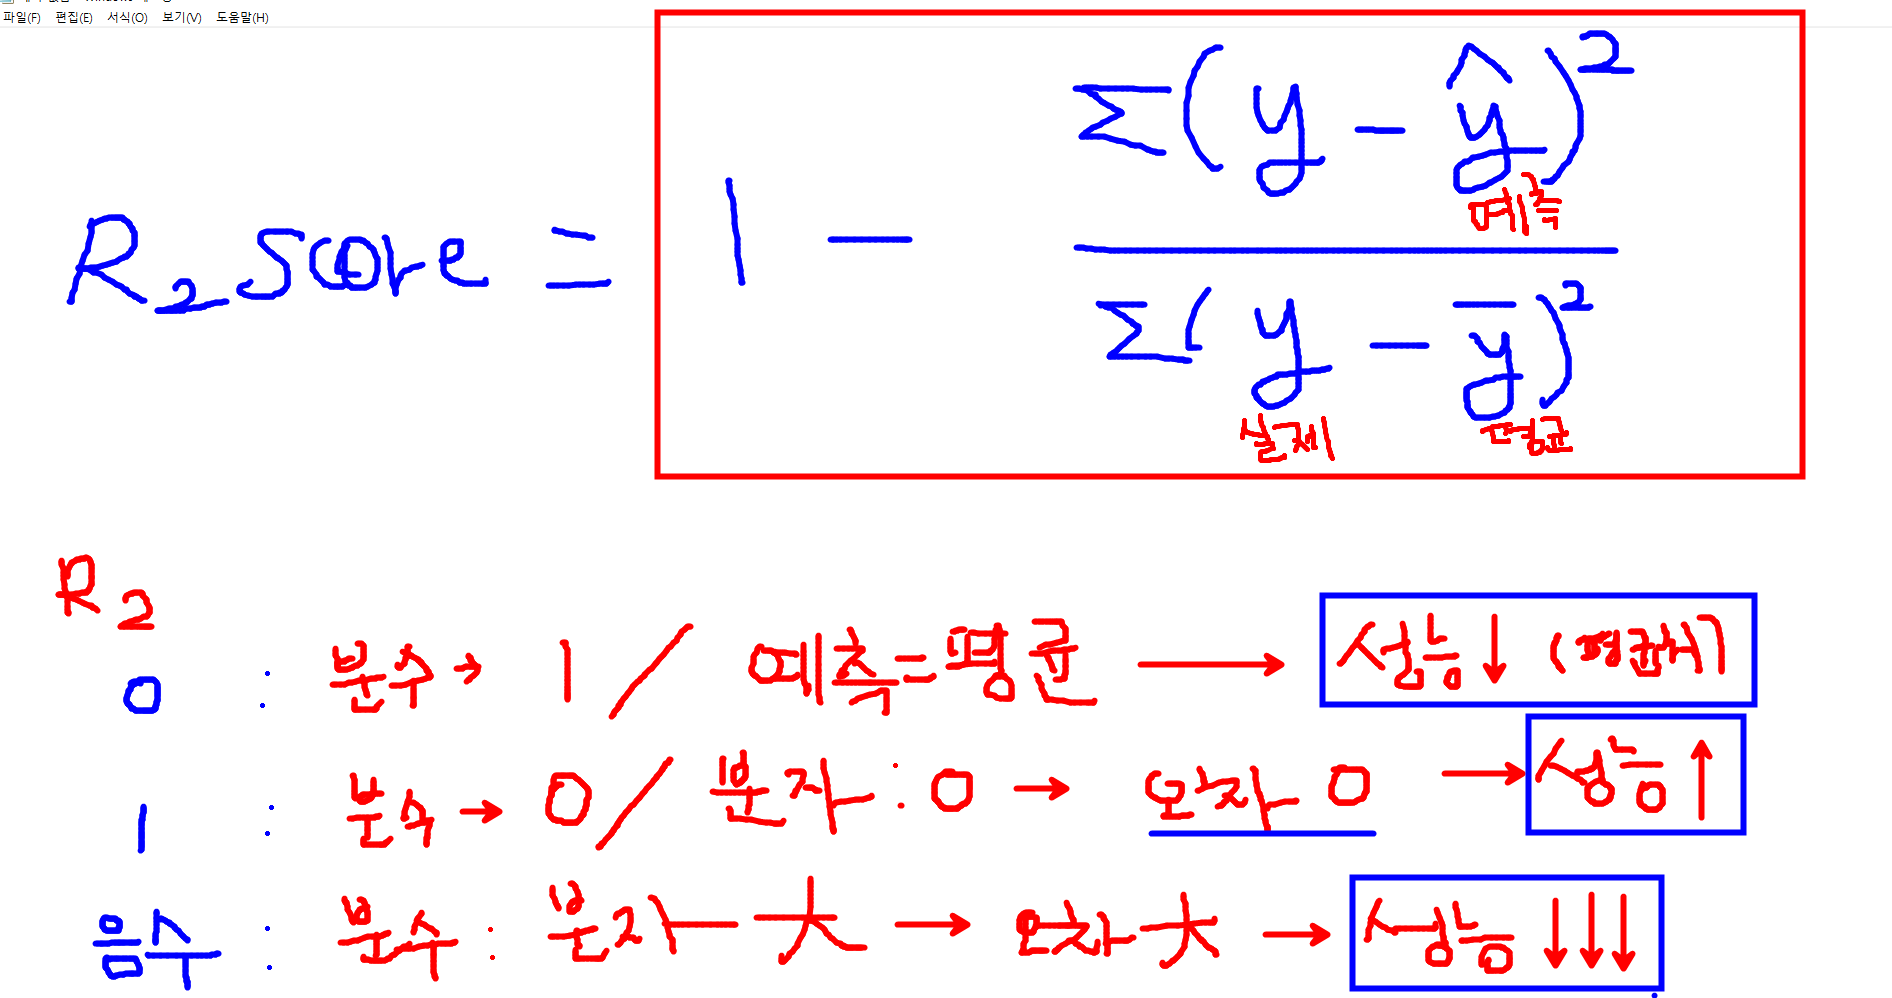

### 스케일링 적용
- 선형모델은 각 특성의 스케일에 영향을 받는 모델 중 하나!
- 경사하강법 모델 적용시 학습의 안정성을 위해서 스케일링을 진행한다!

In [27]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 스케일러 생성
st_scaler = StandardScaler()

In [28]:
# 스케일러 학습
st_scaler.fit(X_train)

StandardScaler()

In [29]:
# 변환
t_X_train = st_scaler.transform(X_train)
t_X_test = st_scaler.transform(X_test)

In [114]:
# 모델학습 및 평가 > r2 score 확인

# LinearRegression
# SGDRegressor
linear_model3 = LinearRegression()
sgd_model3 = SGDRegressor()

# 학습
linear_model3.fit(t_X_train,y_train)
sgd_model3.fit(t_X_train,y_train)

# 평가
print("Linear: ", linear_model3.score(t_X_test, y_test))
print("SGD: ", sgd_model3.score(t_X_test, y_test))
# 평가지표(metrics): R2 score
# 해석방법: 1에 가까울수록 성능이 높음
# score 가 안정적으로 변한것을 확인!

Linear:  0.4581257064433232
SGD:  0.4586330497064913
